In [1]:
import psycopg2
from creds import local_db_password
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from team_analysis_config import team_results_sql, local_host, local_name, local_port, local_user
conn = psycopg2.connect(dbname=local_name, user =local_user, host=local_host, password=local_db_password, port =local_port)
cur = conn.cursor()

In [2]:
source_df = pd.read_sql(team_results_sql, conn)
source_df.head()

,team,season,score_for,score_against,wins,losses,tie,games_played,pythag_wl,real_wl
0,55,2022,40,34,13,5,4,22,0.57,0.72
1,66,2023,55,49,15,9,4,28,0.55,0.63
2,76,2015,23,31,10,5,3,18,0.37,0.67
3,50,2023,56,24,9,8,5,22,0.82,0.53
4,41,2017,26,35,9,7,3,19,0.37,0.56


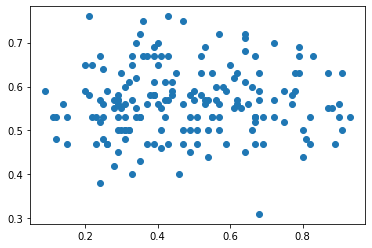

In [3]:
plt.scatter(source_df['pythag_wl'], source_df['real_wl'])
plt.show()

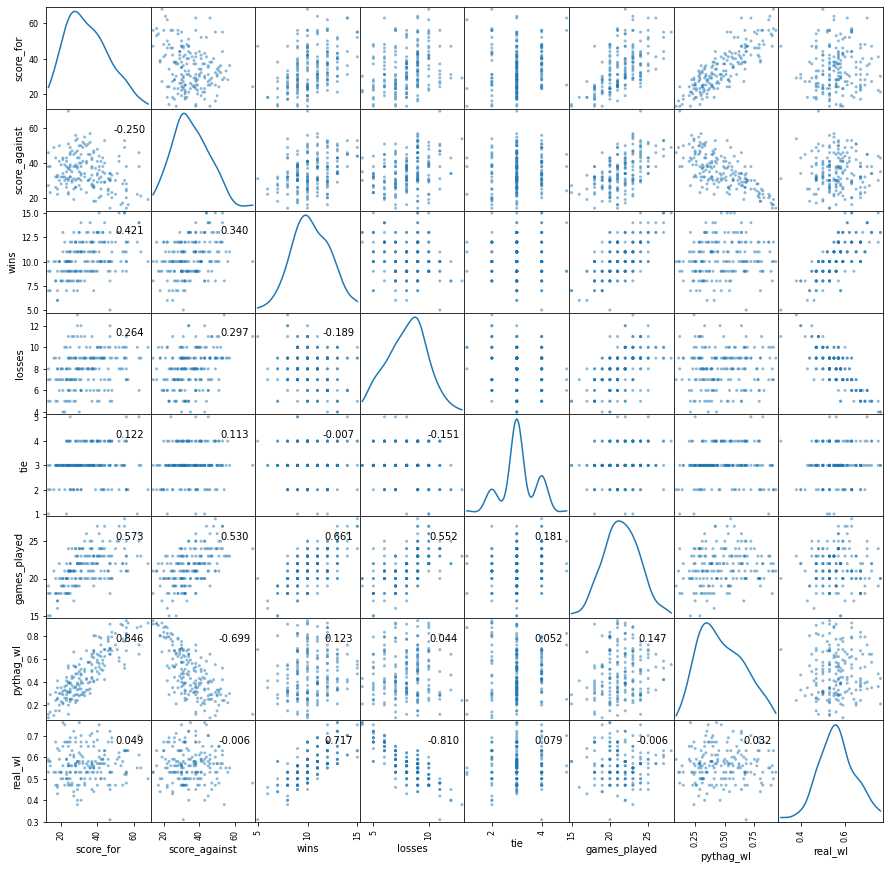

In [4]:
qual_cols = ['team', 'season']
axes = pd.plotting.scatter_matrix(source_df.drop(qual_cols, axis=1), figsize=(15,15), diagonal='kde', alpha=0.5)
corr = source_df.drop(qual_cols, axis=1).corr().to_numpy()
for i, j in zip(*plt.np.tril_indices_from(axes, k=-1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')